In [48]:
from __future__ import print_function
from numpy import linalg as LA
from math import log,pi
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [49]:
iters = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]    
combinations = [] 
for i in range(len(iters)):
    for j in range(i+1,len(iters)):
        combinations.append([i,j])
print(combinations)        

[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [5, 6], [5, 7], [5, 8], [5, 9], [6, 7], [6, 8], [6, 9], [7, 8], [7, 9], [8, 9]]


In [50]:
logreg = []
for i,com in enumerate(combinations):
    logisticRegr = LogisticRegression(solver='liblinear')
    mask1 = train_labels==com[0]
    mask2 = train_labels==com[1]
    mask = np.logical_or(mask1,mask2)
    data = train_data[mask]
    labels = train_labels[mask].astype(int)
    logisticRegr.fit(data, labels)
    logreg.append(logisticRegr)

In [51]:
preds = []
for i,com in enumerate(combinations):
    pred = logreg[i].predict(test_data)
    preds.append(pred)
preds = np.array(preds)
print(preds.shape)
correct=0
final_preds = []
for i in range(1000):
    prediction = np.argmax(np.bincount(preds[:,i]))
    final_preds.append(prediction)
    if prediction == test_labels[i]:
        correct+=1    
    
print(correct/10)
final_preds = np.array(final_preds)

(45, 1000)
90.1


In [52]:
cm = metrics.confusion_matrix(test_labels, final_preds)

<IPython.core.display.Javascript object>


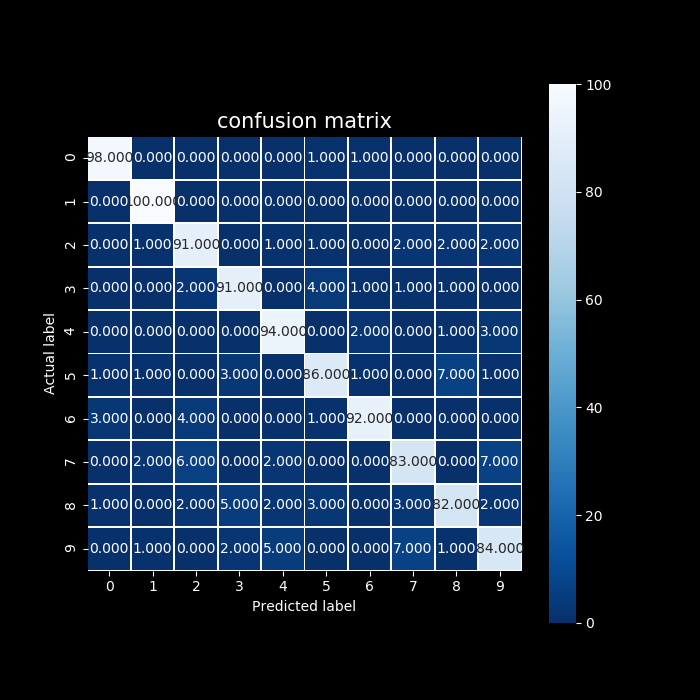

In [56]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('confusion matrix', size = 15);